# Gradient Descent 과제
- updated 1025

#### 1. Simple linear regression 시각화
 - epoch이 증가함에 따라 m,c 가 변하는 추이를 볼 수 있도록 y = mx+c 그래프가 바뀌는 모습을 애니메이션 형태로 표현할 것  
 scatter plot 과 함께 그릴 것  
 
#### 2. Multiple linear regression 구현
 - X = [attenedance, homework, midterm], y=score 일 때 multiple linear regression 을 vectorized GD 로 구현할 것.  
 - ls의 값과 계산된 parameter 값들을 비교할 것.  
 - epoch이 증가함에 따른 parameter의 추이를 보여줄 것.  

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
cd /content/drive/My Drive/T-I-L

/content/drive/My Drive/T-I-L


In [4]:
!pip install celluloid

In [5]:
# ready
import numpy as np
import pandas as pd

import statsmodels.api as sm

import matplotlib.pyplot as plt
plt.style.use('seaborn')
import time

# gif
from IPython.display import HTML
from celluloid import Camera
from moviepy.editor import *

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Imageio: 'ffmpeg-linux64-v3.3.1' was not found on your computer; downloading it now.
Try 1. Download from https://github.com/imageio/imageio-binaries/raw/master/ffmpeg/ffmpeg-linux64-v3.3.1 (43.8 MB)
Downloading: 8192/45929032 bytes (0.0%)909312/45929032 bytes (2.0%)2564096/45929032 bytes (5.6%)5070848/45929032 bytes (11.0%)8765440/45929032 bytes (19.1%)12697600/45929032 bytes (27.6%)16711680/45929032 bytes (36.4%)20414464/45929032 bytes (44.4%)24338432/45929032 bytes (53.0%)28147712/45929032 bytes (61.3%)31997952/45929032 bytes (69.7%)35635200/45929032 bytes (77.6%)39657472/45929032 bytes (86.3%)43638

### Load data

In [6]:
data = pd.read_excel('db_score.xlsx')
X = data['midterm']
y = data['score']

### step2) y = mx+c

* descent GD

In [8]:
def gradient_descent_vectorized(X, y):
    
    # setting
    epochs = 100000
    min_grad = 0.0001
    learning_rate = 0.001
    m = 0.0
    c = 0.0
    n = len(y)
    
    c_grad = 0.0
    m_grad = 0.0
    
    coef = []
    intercept = []

    for epoch in range(epochs):    
    
        y_pred = m * X + c
        m_grad = (2*(y_pred - y)*X).sum()/n
        c_grad = (2 * (y_pred - y)).sum()/n
        
        m = m - learning_rate * m_grad
        c = c - learning_rate * c_grad        

        if ( epoch % 1000 == 0):
            print("epoch %d: m_grad=%f, c_grad=%f, m=%f, c=%f" %(epoch, m_grad, c_grad, m, c) )
            coef.append(m); intercept.append(c)
    
        if ( abs(m_grad) < min_grad and abs(c_grad) < min_grad ):
            break

    return m, c, coef, intercept

start_time = time.time()
m, c, coef, intercept = gradient_descent_vectorized(X, y)
end_time = time.time()

print("%f seconds" %(end_time - start_time))

print("\n\nFinal:")
print("gdv_m=%f, gdv_c=%f" %(m, c) )
#print("ls_m=%f, ls_c=%f" %(ls_m, ls_c) )

epoch 0: m_grad=-3227.859378, c_grad=-128.088261, m=3.227859, c=0.128088
epoch 1000: m_grad=0.152477, c_grad=-3.995112, m=2.441183, c=4.530306
epoch 2000: m_grad=0.124641, c_grad=-3.265779, m=2.303106, c=8.148144
epoch 3000: m_grad=0.101887, c_grad=-2.669590, m=2.190235, c=11.105523
epoch 4000: m_grad=0.083287, c_grad=-2.182239, m=2.097970, c=13.523012
epoch 5000: m_grad=0.068082, c_grad=-1.783857, m=2.022548, c=15.499174
epoch 6000: m_grad=0.055653, c_grad=-1.458203, m=1.960895, c=17.114574
epoch 7000: m_grad=0.045494, c_grad=-1.191998, m=1.910497, c=18.435073
epoch 8000: m_grad=0.037188, c_grad=-0.974391, m=1.869300, c=19.514506
epoch 9000: m_grad=0.030399, c_grad=-0.796510, m=1.835623, c=20.396882
epoch 10000: m_grad=0.024850, c_grad=-0.651102, m=1.808094, c=21.118175
epoch 11000: m_grad=0.020313, c_grad=-0.532239, m=1.785591, c=21.707790
epoch 12000: m_grad=0.016605, c_grad=-0.435075, m=1.767196, c=22.189768
epoch 13000: m_grad=0.013574, c_grad=-0.355650, m=1.752159, c=22.583757
ep

### step3) Visualize
### 1. Simple linear regression 시각화¶
epoch이 증가함에 따라 m,c 가 변하는 추이를 볼 수 있도록 y = mx+c 그래프가 바뀌는 모습을 애니메이션 형태로 표현할 것
scatter plot 과 함께 그릴 것

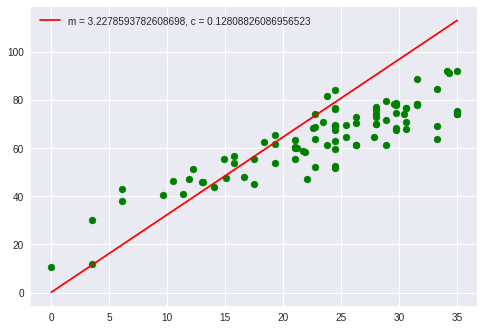

In [41]:
# Visualize
fig, axes = plt.subplots()
camera = Camera(fig)

for i in range(len(coef)):
    y_pred = coef[i]*X + intercept[i]
    axes.scatter(X, y, color='green')
    axes.plot([min(X),max(X)], [min(y_pred), max(y_pred)], color='red')
    axes.legend([f'm = {coef[i]}, c = {intercept[i]}'], loc='upper left')
    plt.show()
    
    camera.snap()

In [43]:
# Save animation
animation = camera.animate(interval=300, repeat=True)
HTML(animation.to_html5_video())

animation.save('animation_lr.mp4')

clip = (VideoFileClip('animation_lr.mp4').speedx(2))
clip.write_gif('animation_lr.gif')


[MoviePy] Building file animation_lr.gif with imageio


100%|██████████| 27/27 [00:01<00:00, 26.38it/s]


gif moviepy 설치가 안되는 이슈때문에 colab 에서 만듦 - 1026
